# sumario

# 1. Introdução

A classificação de grãos é uma etapa fundamental no controle de qualidade dentro da cadeia produtiva agrícola. Atualmente, em muitas cooperativas de pequeno e médio porte, esse processo ainda é realizado de forma manual por especialistas, utilizando inspeção visual e ferramentas simples. Isso gera desafios como alta demanda de tempo, custos operacionais elevados e possíveis erros humanos, afetando diretamente a eficiência e a qualidade do produto final.

Este projeto tem como foco o desenvolvimento de um sistema inteligente capaz de realizar a classificação automática de grãos de trigo com base em suas características físicas. A solução utiliza algoritmos de Machine Learning aplicados ao "Seeds Dataset" do UCI Machine Learning Repository, com amostras de três tipos de trigo: Kama, Rosa e Canadian.

Além do desenvolvimento dos modelos, será criado um dashboard interativo utilizando Streamlit, que permitirá que qualquer usuário — mesmo sem conhecimento técnico — possa realizar classificações, visualizar análises e extrair informações úteis sobre os grãos analisados.

# 1.2 instalação das bibliotecas

In [4]:
# Instalação de pacotes necessários (rode apenas se ainda não tiver eles instalados no seu ambiente)

# Para quem usa pip
!pip install pandas numpy matplotlib seaborn scikit-learn

# Para quem usa conda
# !conda install pandas numpy matplotlib seaborn scikit-learn -y



## 1.3 importação das bibliotecas

In [5]:
# Verificar o interpretador em uso (opcional, só pra conferência)
import sys
print(sys.executable)

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\vitor\anaconda3\envs\cap3-iralem\python.exe


# 2. processamento de dados

## 2.1 Carregando dados

In [6]:
import os
print(os.getcwd())

colunas = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length',
           'Kernel_Width', 'Asymmetry_Coeff', 'Groove_Length', 'Class']

df = pd.read_csv('../dados/processados/seeds_dataset.txt', delim_whitespace=True, names=colunas)
df.head()

C:\Users\vitor\Documents\GitHub\Cap3-ImplementandoalgoritmosdeMachineLearningcomScikitlearn\notebooks


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## 2.2 dados faltantes ou nulos

nessa etapa seraverificado se existem valores ausentes (nulos).

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Groove_Length      0
Class              0
dtype: int64

pode-se concluir que nenhuma coluna de dados apresenta valores nulos

## 3. visualização grafica

### histograma das sementes

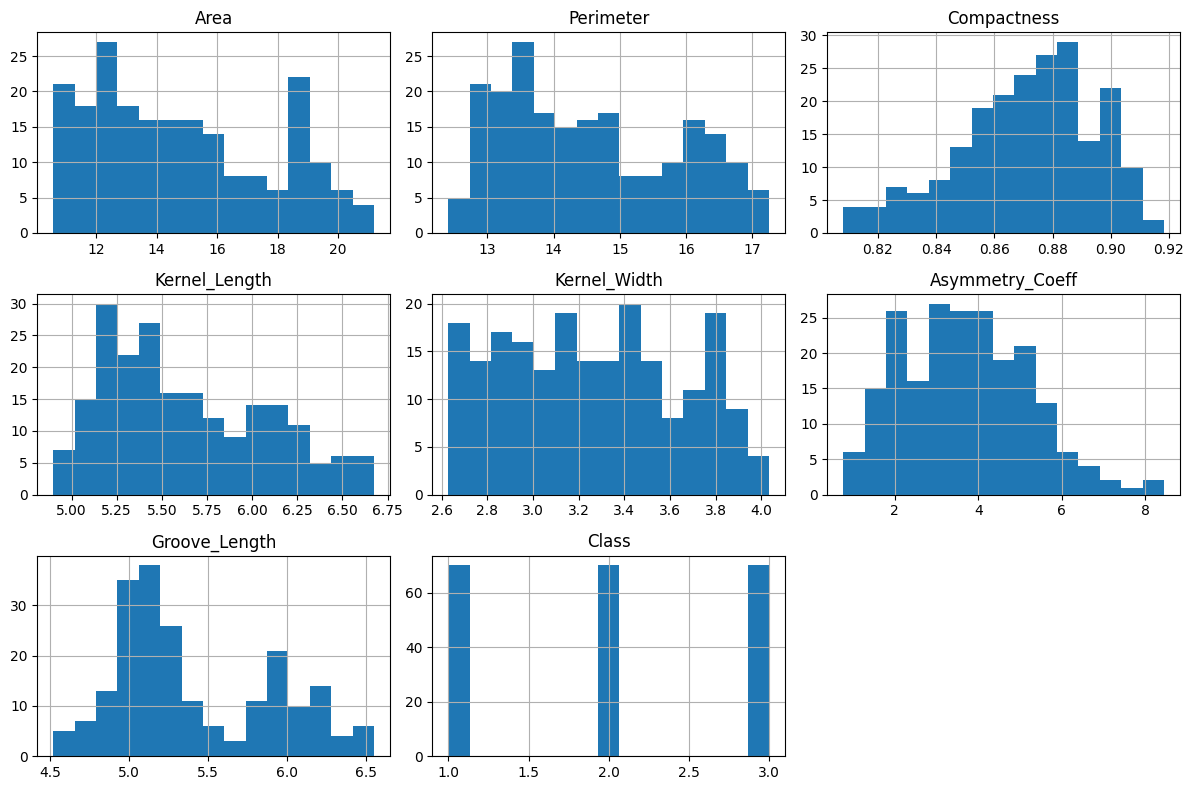

In [9]:
df.hist(figsize=(12,8), bins=15)
plt.tight_layout()
plt.show()

A imagem apresenta os histogramas das distribuições das variáveis do conjunto de dados seeds_dataset.txt, utilizado para classificação de tipos de sementes com base em características morfológicas. Ao analisar essas distribuições, é possível tirar conclusões importantes sobre o comportamento dos dados e sua adequação para algoritmos de aprendizado de máquina.

A variável Area apresenta uma distribuição assimétrica à direita, concentrando a maioria das amostras entre os valores 11 e 16, mas com uma cauda que se estende até valores superiores a 20. A variável Perimeter segue um padrão semelhante, o que é esperado, já que perímetro e área tendem a estar correlacionados em formas geométricas. A variável Compactness, por outro lado, exibe uma distribuição mais simétrica, levemente normal, com uma concentração clara entre 0,86 e 0,89, indicando que essa característica varia menos entre os diferentes tipos de sementes.

As variáveis Kernel_Length e Kernel_Width apresentam padrões distintos. O comprimento do grão tem distribuição levemente assimétrica, com concentração entre 5,2 e 5,7, enquanto a largura do grão possui uma distribuição relativamente uniforme, sugerindo que essa medida não é um fator de diferenciação tão evidente entre as classes. Já a variável Asymmetry_Coeff mostra uma distribuição bastante dispersa e assimétrica, com vários valores extremos, o que indica alta variabilidade e possível presença de outliers. Essa característica pode representar um fator relevante para diferenciação entre classes, embora exija cuidado em sua análise estatística.

A variável Groove_Length apresenta uma distribuição bimodal, com dois picos em torno de 5,0 e 6,0. Essa característica sugere que há pelo menos dois grupos distintos de sementes com diferentes padrões de sulco, o que pode ser altamente discriminativo entre as classes. Por fim, a variável Class mostra uma distribuição perfeitamente balanceada entre as três categorias (valores 1, 2 e 3), o que é ideal para tarefas de classificação, pois evita viés do modelo em função de classes desbalanceadas.

Conclusão
O conjunto de dados apresenta características morfométricas com diferentes padrões de distribuição, variando de simétricas a altamente assimétricas. A maioria das variáveis possui uma boa dispersão, indicando que elas carregam informação útil para classificação. A presença de um dataset balanceado entre as classes favorece o treinamento de modelos supervisionados. Entretanto, variáveis como Asymmetry_Coeff e Groove_Length exigem atenção especial por sua alta variabilidade e possível presença de outliers. Como próximo passo, recomenda-se aplicar uma etapa de pré-processamento com normalização ou padronização dos dados, além de avaliar correlações entre variáveis para reduzir redundância e melhorar a eficiência dos modelos de machine learning.

### box plot

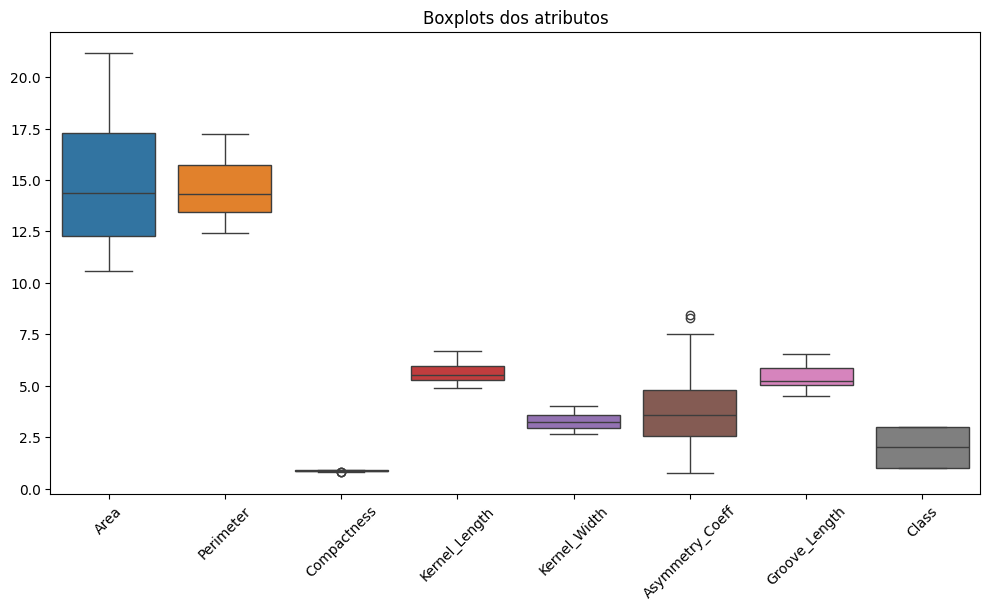

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots dos atributos")
plt.show()

Esse gráfico apresenta boxplots para os atributos de um conjunto de dados, mostrando a distribuição, mediana, quartis, e possíveis outliers de cada variável.

Observa-se que os atributos "Area" e "Perimeter" possuem valores mais elevados em comparação com os demais, com medianas próximas a 14 e 14 respectivamente, e uma variação maior, principalmente em "Area", que apresenta valores máximos superiores a 20. Já o atributo "Compactness" tem valores bem concentrados, com pouca variação e medianas próximas a 0,8, indicando que seus dados são bastante homogêneos.

Os atributos "Kernel_Length", "Kernel_Width" e "Groove_Length" apresentam medianas entre 3 e 6, com variações moderadas e sem muitos outliers aparentes, exceto "Groove_Length" que parece mais concentrado. O "Asymmetry_Coeff" destaca-se por ter uma variação maior, com uma mediana próxima de 3,5 e alguns outliers acima de 8, indicando que esse atributo tem alguns valores extremos que fogem da tendência central.

Por fim, o atributo "Class" apresenta valores discretos, provavelmente categóricos codificados numericamente, com mediana em 2 e valores que parecem concentrados entre 1 e 3.

Conclusão: O gráfico indica que os dados possuem diferentes escalas e variações entre os atributos, com alguns atributos mostrando maior dispersão (como Area e Asymmetry_Coeff) e outros com dados mais concentrados (Compactness). A presença de outliers, especialmente em Asymmetry_Coeff, pode exigir atenção para tratamento ou análise específica dependendo do objetivo do estudo. Além disso, as diferenças de escala sugerem que uma normalização ou padronização dos dados pode ser necessária para modelos de aprendizado de máquina.

### matriz de correlação 

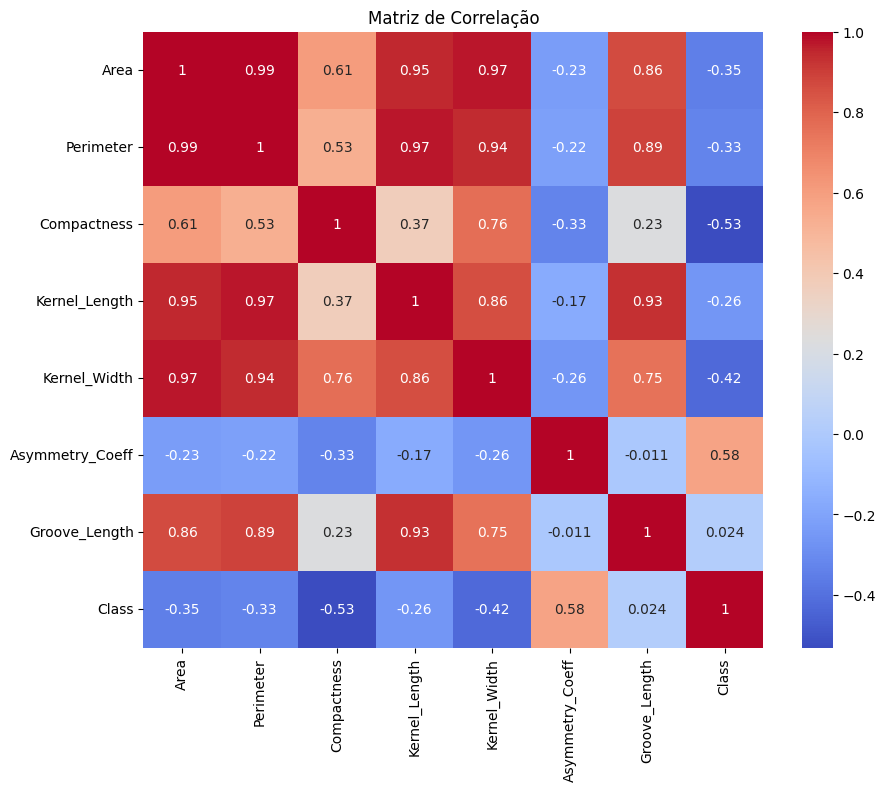

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Esta matriz de correlação mostra a relação entre diferentes variáveis do conjunto de dados, onde os valores variam de -1 a 1. Valores próximos de 1 indicam uma forte correlação positiva, valores próximos de -1 indicam uma forte correlação negativa, e valores próximos de 0 indicam pouca ou nenhuma correlação linear entre as variáveis.

Observa-se que as variáveis "Area", "Perimeter", "Kernel_Length", "Kernel_Width" e "Groove_Length" possuem correlações muito fortes e positivas entre si, com valores geralmente acima de 0.75, destacando que estas medidas provavelmente aumentam ou diminuem conjuntamente, indicando que estão fortemente relacionadas.

Já a variável "Compactness" tem correlações moderadas e positivas com as mesmas variáveis, mas não tão fortes, com valores em torno de 0.37 a 0.76. Isso indica que "Compactness" está relacionada com as outras, porém com menor intensidade.

A variável "Asymmetry_Coeff" apresenta correlações negativas com quase todas as demais variáveis principais, entre -0.17 e -0.33, exceto com "Class", com uma correlação positiva moderada de 0.58. Isso sugere que conforme o coeficiente de assimetria aumenta, outras medidas tendem a diminuir, e que "Asymmetry_Coeff" pode estar positivamente associada à classe de classificação dos dados.

Por fim, a variável "Class" mostra correlações negativas moderadas com a maioria das variáveis, como "Area", "Perimeter", "Compactness" e outras, com valores entre -0.26 e -0.53, exceto pelo coeficiente de assimetria, que tem correlação positiva.

Conclusão: As variáveis de tamanho físico ("Area", "Perimeter", "Kernel_Length", "Kernel_Width" e "Groove_Length") estão fortemente correlacionadas entre si, sugerindo que podem representar características relacionadas de um mesmo objeto. O coeficiente de assimetria tem um comportamento inverso em relação a essas medidas, mas se relaciona positivamente com a classificação, indicando que pode ser uma variável importante para distinguir as classes no conjunto de dados. A variável "Class" parece estar associada negativamente aos valores físicos, o que pode indicar que diferentes classes têm tamanhos distintos e variáveis relacionadas ao formato ou simetria.

## 4. Salvando o dataset processado

### 4.1 pré processamento

In [13]:
df['Class'].value_counts()
df['Class'] = df['Class'].replace({1: 'Kama', 2: 'Rosa', 3: 'Canadian'})

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y.values
df_scaled.to_csv('../dados/seeds_tratado.csv', index=False)

### 4.2 salvando o dataset processado

df_scaled.to_csv('../dados/processados/seeds_dataset_processado.csv', index=False)

# 5. Modelagem

### 5.1 Carrega os dados tratados

In [16]:
df = pd.read_csv('../dados/seeds_tratado.csv')

X = df.drop('Class', axis=1)
y = df['Class']

# Codificar classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

### 5.2 Importa os algoritimos

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### 5.3 Cria os modelos preditivos

In [21]:
modelos = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

### 5.4 Treina e avalia os modelos preditivos

Modelo: KNN
Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:


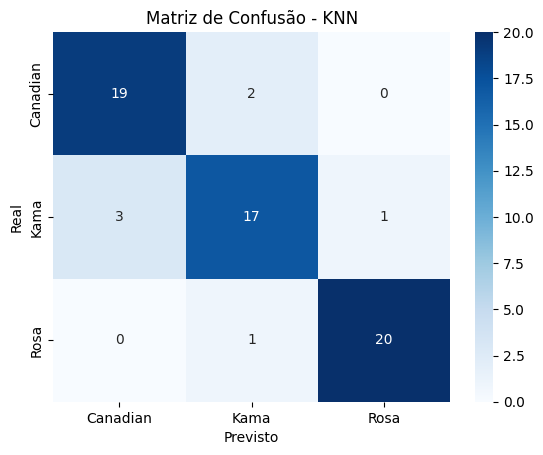

Modelo: SVM
Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:


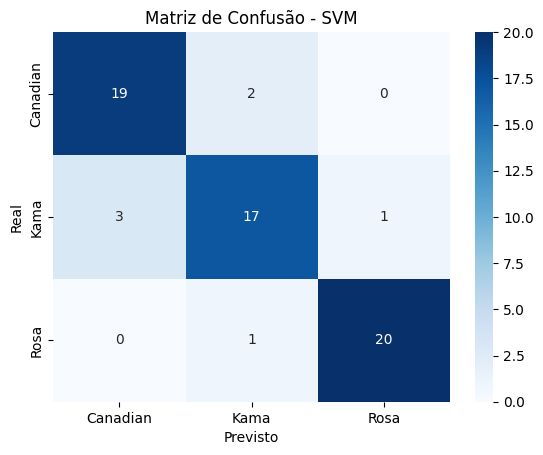

Modelo: Random Forest
Acurácia: 0.8413
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63

Matriz de Confusão:


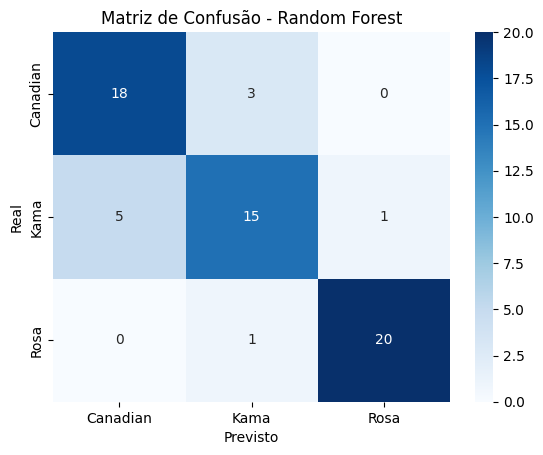

Modelo: Naive Bayes
Acurácia: 0.8413
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63

Matriz de Confusão:


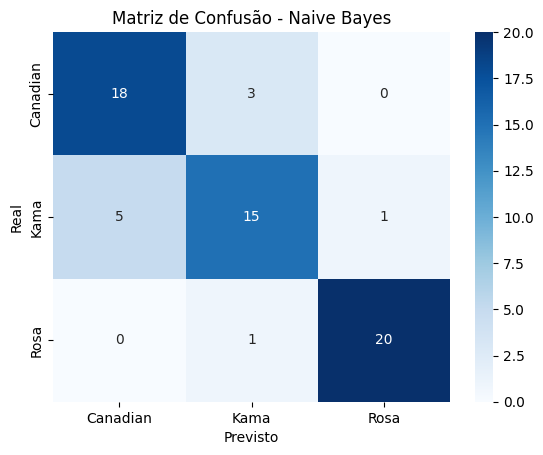

Modelo: Logistic Regression
Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.90      0.90      0.90        21
        Kama       0.86      0.86      0.86        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63

Matriz de Confusão:


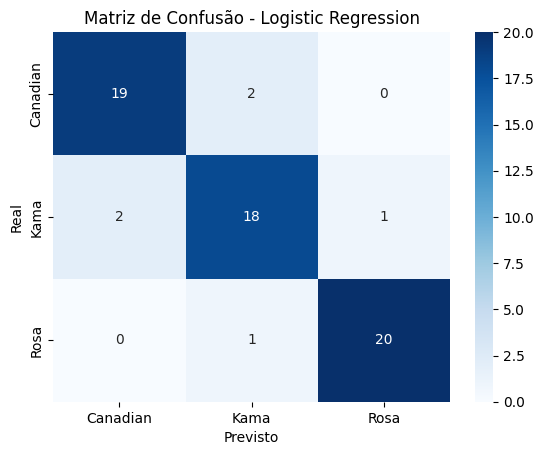

In [23]:
resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    resultados[nome] = {
        "Acurácia": acc,
        "Relatório": report,
        "Matriz de Confusão": cm
    }

    print(f"Modelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Matriz de Confusão:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

Foram aplicados os seguintes algoritmos de Machine Learning: KNN, SVM, Random Forest, Naive Bayes e Regressão Logística para classificar três tipos de trigo: Canadian, Kama e Rosa. A avaliação foi feita com base na acurácia, relatório de classificação (precision, recall, f1-score) e matriz de confusão.

1. KNN (K-Nearest Neighbors)
Acurácia: 0.8889

Principais pontos:

Boa performance geral, com destaque para a classe Rosa, que apresentou 95% de precisão e recall.

A classe Kama teve o pior desempenho relativo, com um f1-score de 0.83, mostrando que o modelo teve mais dificuldades em diferenciá-la das demais.

Erros principais: Kama sendo confundida com Canadian (3 casos).

2. SVM (Support Vector Machine)
Acurácia: 0.8889

Principais pontos:

O desempenho foi idêntico ao KNN, com os mesmos valores de precision, recall e f1-score para todas as classes.

As previsões erradas ocorreram nos mesmos pontos da matriz de confusão, sugerindo um padrão de erro consistente com o KNN.

Conclusão: Ambos (SVM e KNN) têm comportamento muito parecido neste conjunto de dados.

3. Random Forest
Acurácia: 0.8413

Principais pontos:

Teve uma queda no desempenho geral, especialmente na classe Kama, com um recall de apenas 0.71.

Embora a classe Rosa ainda tenha se saído muito bem (0.95 de precisão e recall), as demais tiveram resultados mais modestos.

Erros principais: Mais confusões entre Canadian e Kama, com 5 amostras de Kama sendo classificadas como Canadian.

4. Naive Bayes
Acurácia: 0.8413

Principais pontos:

Desempenho muito semelhante ao Random Forest, com os mesmos valores de precisão, recall e f1-score por classe.

As confusões também se concentraram entre Canadian e Kama, com tendência a classificar erroneamente amostras de Kama como Canadian.

Conclusão: Tanto o Random Forest quanto o Naive Bayes tiveram dificuldade principalmente com a classe Kama.

5. Regressão Logística
Acurácia: 0.9048 (melhor entre todos os modelos)

Principais pontos:

Apresentou o melhor equilíbrio entre as classes, com f1-score igual ou superior a 0.86 para todas as classes.

A classe Kama teve sua melhor performance entre todos os modelos (recall de 0.86).

Menor número de erros na matriz de confusão, com destaque para a menor confusão entre Kama e Canadian comparado aos outros modelos.

Conclusão: Foi o modelo com melhor desempenho geral, tanto em acurácia quanto em equilíbrio entre as métricas de todas as classes.

# 6. Otimização

nesta etapa utiliza-se um GrindSearchCV para otimizar os códigos

Melhores parâmetros KNN: {'n_neighbors': 3}
Acurácia: 0.8888888888888888
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.83      0.90      0.86        21
        Kama       0.85      0.81      0.83        21
        Rosa       1.00      0.95      0.98        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



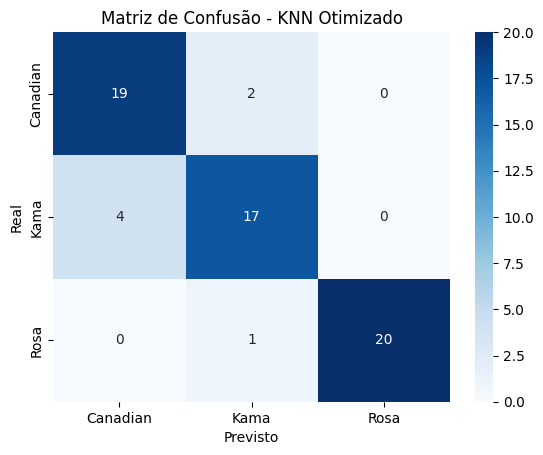

In [24]:
# GridSearch para KNN
param_knn = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Melhores parâmetros KNN:", grid_knn.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - KNN Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show() 

Melhores parâmetros SVM: {'C': 1, 'kernel': 'linear'}
Acurácia: 0.8888888888888888
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



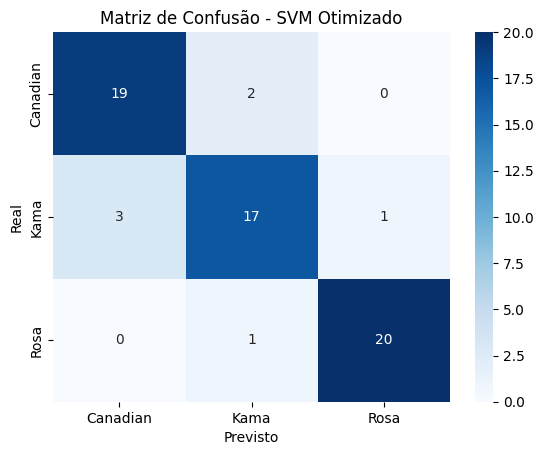

In [25]:
# GridSearch para SVM
param_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_svm = GridSearchCV(SVC(), param_svm, cv=5)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Melhores parâmetros SVM:", grid_svm.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - SVM Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Melhores parâmetros Random Forest: {'max_depth': 5, 'n_estimators': 50}
Acurácia: 0.8412698412698413
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



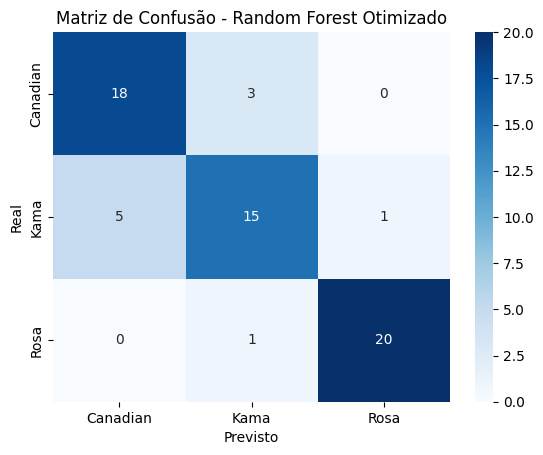

In [26]:
# GridSearch para Random Forest
param_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Melhores parâmetros Random Forest:", grid_rf.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - Random Forest Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Os três gráficos de matriz de confusão e relatórios de classificação fornecem uma análise comparativa do desempenho de três modelos de aprendizado de máquina otimizados usando GridSearchCV: K-NN, SVM e Random Forest, aplicados a um problema de classificação com três classes (Canadian, Kama, Rosa).

1. K-NN Otimizado:

- Melhores Parâmetros: n_neighbors = 3
- Acurácia: 0.8888888888888888 (aproximadamente 88.89%)
- Relatório de Classificação:
 - Canadian: Precisão de 0.83, Recall de 0.90, f1-score de 0.86. Isso indica que, dos exemplos classificados como Canadian, 83% estavam corretos, e 90% de todos os exemplos de Canadian foram corretamente identificados.
 - Kama: Precisão de 0.85, Recall de 0.81, f1-score de 0.83.
 - Rosa: Precisão de 1.00, Recall de 0.95, f1-score de 0.98. A classe Rosa foi muito bem classificada, com precisão perfeita.
 - Médias: As médias (macro avg e weighted avg) para precisão, recall e f1-score são todas 0.89, indicando um bom desempenho geral e balanceado entre as classes.
   
- Matriz de Confusão:
 - Canadian: 19 acertos, 2 erros (classificados como Kama).
 - Kama: 17 acertos, 4 erros (classificados como Canadian).
 - Rosa: 20 acertos, 1 erro (classificado como Kama). A classe Rosa é a mais bem identificada, com poucos falsos positivos ou falsos negativos.
   
2. SVM Otimizado:

- Melhores Parâmetros: C = 1, kernel = 'linear'
- Acurácia: 0.8888888888888888 (aproximadamente 88.89%)
Relatório de Classificação:
-  Canadian: Precisão de 0.86, Recall de 0.90, f1-score de 0.88.
-  Kama: Precisão de 0.85, Recall de 0.81, f1-score de 0.83.
-  Rosa: Precisão de 0.95, Recall de 0.95, f1-score de 0.95. A classe Rosa continua com um desempenho forte.
-  Médias: As médias (macro avg e weighted avg) são 0.89, semelhantes ao K-NN.
-  Matriz de Confusão:
-  Canadian: 19 acertos, 2 erros (classificados como Kama).
-  Kama: 17 acertos, 3 erros (classificados como Canadian), 1 erro (classificado como Rosa).
-  Rosa: 20 acertos, 1 erro (classificado como Kama).
  
3. Random Forest Otimizado:
   
- Melhores Parâmetros: max_depth = 5, n_estimators = 50
- Acurácia: 0.8412698412698413 (aproximadamente 84.13%)
- Relatório de Classificação:
- Canadian: Precisão de 0.78, Recall de 0.86, f1-score de 0.82. Houve uma queda na precisão para Canadian em comparação com K-NN e SVM.
- Kama: Precisão de 0.79, Recall de 0.71, f1-score de 0.75. Esta classe teve o pior desempenho entre os três modelos.
- Rosa: Precisão de 0.95, Recall de 0.95, f1-score de 0.95. O desempenho para a classe Rosa permanece alto.
- Médias: As médias (macro avg e weighted avg) são 0.84, refletindo a menor acurácia geral.
- Matriz de Confusão:
- Canadian: 18 acertos, 3 erros (classificados como Kama).
- Kama: 15 acertos, 5 erros (classificados como Canadian), 1 erro (classificado como Rosa). Mais erros do que os outros modelos.
- Rosa: 20 acertos, 1 erro (classificado como Kama).

Conclusão:

Após a otimização com GridSearchCV, tanto o K-NN quanto o SVM apresentaram um desempenho superior ao Random Forest para este conjunto de dados. Ambos alcançaram a mesma acurácia (aproximadamente 88.89%) e métricas de precisão, recall e f1-score muito semelhantes e altas.

A classe "Rosa" foi consistentemente a mais fácil de classificar corretamente para todos os modelos, com altas pontuações de precisão e recall. As classes "Canadian" e "Kama" apresentaram mais confusões entre si, como visto nas células fora da diagonal principal das matrizes de confusão. Especificamente, há uma tendência de "Kama" ser confundido com "Canadian" e vice-versa.

O Random Forest, embora ainda com um bom desempenho, teve uma acurácia ligeiramente menor e métricas de classificação mais baixas para as classes "Canadian" e "Kama" em comparação com K-NN e SVM.

Em termos de escolha do melhor modelo para este projeto, tanto o K-NN quanto o SVM otimizados seriam excelentes opções, dado o desempenho similar e robusto que demonstraram. A escolha final entre eles poderia depender de outros fatores como interpretabilidade do modelo, tempo de treinamento e inferência, ou se há alguma preferência específica por uma das métricas em um contexto de aplicação real (e.g., priorizar recall sobre precisão para uma classe específica, ou vice-versa). No entanto, com base puramente nas métricas de desempenho fornecidas, ambos os modelos são igualmente fortes.